# House price prediction


### Importing the libraries

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import style 

## Importing the dataset

In [78]:
dataset = pd.read_csv("Real_estate.csv")

### Utilizing essential data

In [79]:
dataset1 = dataset.drop("X1 transaction date",axis = 1)

In [80]:
dataset1

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,8.1,104.81010,5,24.96674,121.54067,52.5


### Describing dataset

In [81]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


<AxesSubplot:ylabel='X2 house age'>

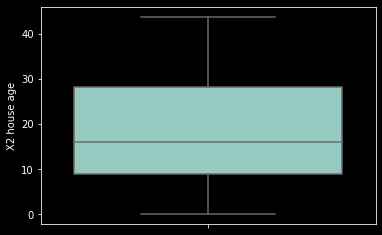

In [82]:

sns.boxplot(data=dataset1,y='X2 house age')

<AxesSubplot:ylabel='X3 distance to the nearest MRT station'>

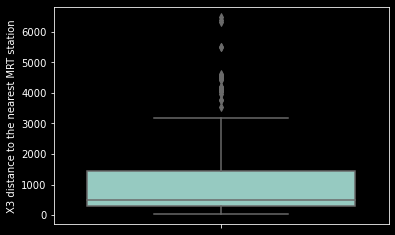

In [83]:
sns.boxplot(data=dataset1,y='X3 distance to the nearest MRT station')

<AxesSubplot:ylabel='X4 number of convenience stores'>

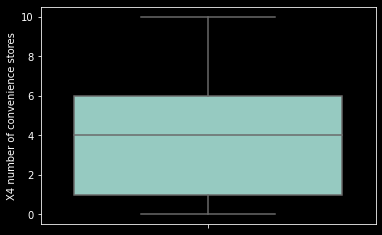

In [84]:
sns.boxplot(data=dataset1,y='X4 number of convenience stores')

<AxesSubplot:ylabel='X5 latitude'>

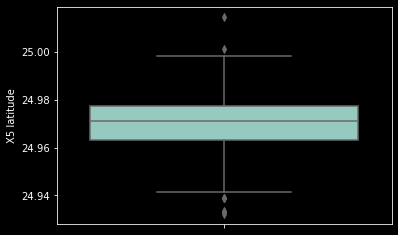

In [85]:
sns.boxplot(data=dataset1,y='X5 latitude')

<AxesSubplot:ylabel='X6 longitude'>

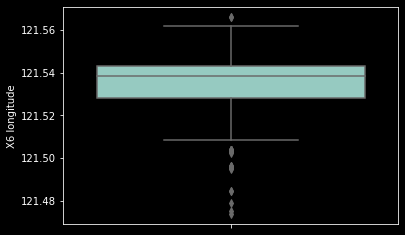

In [86]:
sns.boxplot(data=dataset1,y='X6 longitude')

<AxesSubplot:ylabel='Y house price of unit area'>

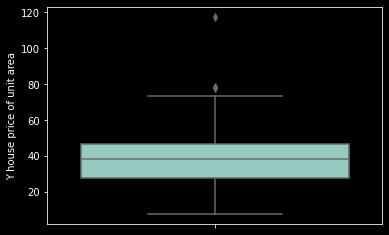

In [87]:
sns.boxplot(data=dataset1,y='Y house price of unit area')

### Extracting Rows and Column 

In [88]:
x = dataset1.iloc[:, 1:-1].values
y = dataset1.iloc[:, -1].values

## Visualizing data 

#### Plot-wise Relationship between X- axes and Y- axis

<Figure size 432x864 with 0 Axes>

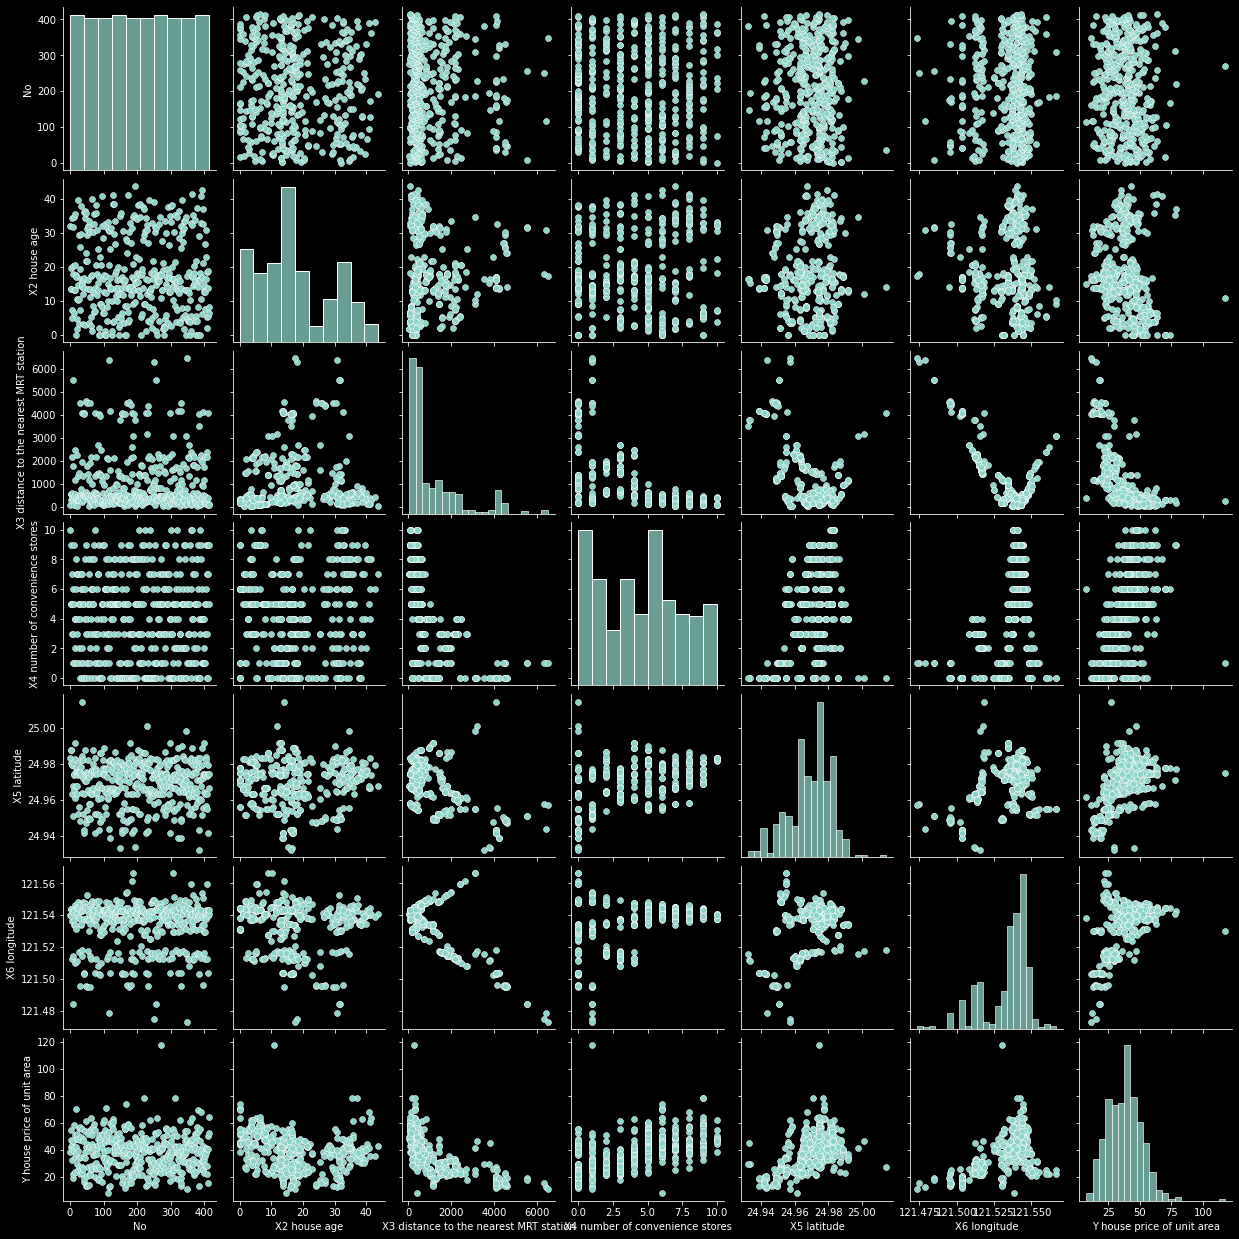

In [89]:
plt.figure(figsize=(6,12))
sns.pairplot(dataset1)
plt.show()

#### Graphical representation of data

<AxesSubplot:>

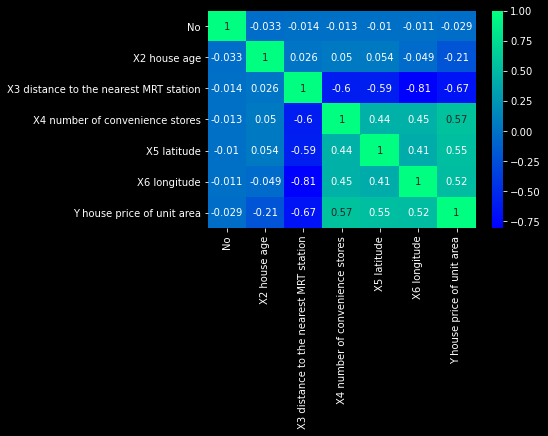

In [90]:
style.use("dark_background")
sns.heatmap(dataset1.corr(),annot=True,cmap="winter",linecolor="white")

## Spliting data in training set and test set

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Training the Linear regression model on training set

In [92]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Predicting test set results 

In [93]:
y_pred = regressor.predict(x_test)

In [94]:
rss = y_test-y_pred

#### Relationship between rss and y_pred

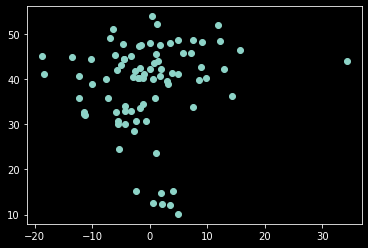

In [95]:
plt.scatter(rss,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

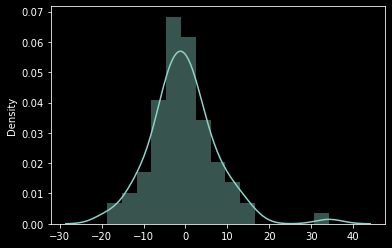

In [96]:
sns.distplot(rss)

## R-Squared metrics

In [97]:
r2_score(y_test,y_pred)

0.6420691483643988

## Actual vs Predicted

In [98]:
df = pd.DataFrame({'Actual': y_test, 'Predictions': y_pred})  
df['Predictions']= round(df['Predictions'])
df.tail()

,Actual,Predictions
78,53.0,46.0
79,38.2,43.0
80,46.7,46.0
81,24.6,30.0
82,36.2,42.0


#### Plotting a graph between Actual and Predicted data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Predictions'>

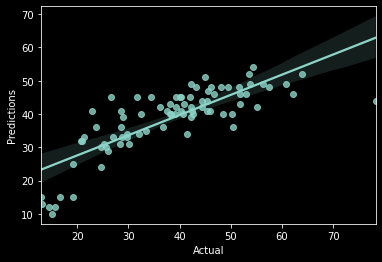

In [99]:
sns.regplot('Actual','Predictions',data=df)